# Dimensionaltiy Reduction Comparison and Stuff

Still have some data to add.

In [114]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [209]:
# pip install --upgrade seaborn
!pip install tabulate

Defaulting to user installation because normal site-packages is not writeable
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Mmmmm colors.

In [116]:
sns.color_palette('pastel')

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

## The Data

In [229]:
# df = pd.read_pickle('./resultsNF.pkl') #results
df = pd.read_pickle('./resultsNFCORPUS.pkl') #results

# resultsNFCORPUS.pkl
len(df)

16200

In [224]:
trec_covid_contriever = df[df['model'] == 'contriever']
trec_covid_contriever = trec_covid_contriever[trec_covid_contriever['f1']!= 1.000000]
trec_covid_contriever = trec_covid_contriever[trec_covid_contriever['precision'] > 0.6]

# df[df['embedding_dim'] == 128 or 
x = trec_covid_contriever[trec_covid_contriever['embedding_dim'] >= 256] #268	0.081335	
x

,model,chunk_size,overlap,embedding_dim,precision,recall,f1,query_size
343,contriever,150,0.05,268,0.685841,1.0,0.813648,"(25, 50)"
344,contriever,150,0.05,288,0.685841,1.0,0.813648,"(25, 50)"
345,contriever,150,0.05,307,0.685841,1.0,0.813648,"(25, 50)"
346,contriever,150,0.05,326,0.685841,1.0,0.813648,"(25, 50)"
347,contriever,150,0.05,345,0.685841,1.0,0.813648,"(25, 50)"
...,...,...,...,...,...,...,...,...
3895,contriever,250,0.30,307,0.841584,1.0,0.913978,"(50, 100)"
3896,contriever,250,0.30,326,0.841584,1.0,0.913978,"(50, 100)"
3897,contriever,250,0.30,345,0.841584,1.0,0.913978,"(50, 100)"
3898,contriever,250,0.30,364,0.841584,1.0,0.913978,"(50, 100)"


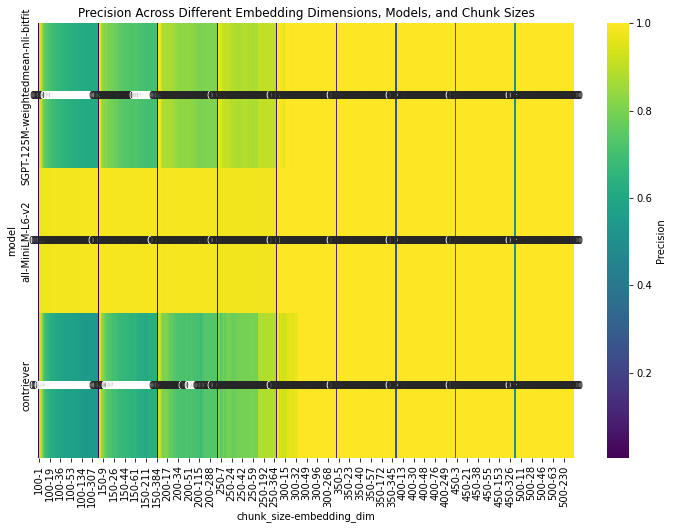

In [225]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = results
df_heatmap = results[['model', 'chunk_size', 'embedding_dim', 'precision']]

heatmap_data = df_heatmap.pivot_table(index='model', columns=['chunk_size', 'embedding_dim'], values='precision')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='.2f', cbar_kws={'label': 'Precision'})
plt.title('Precision Across Different Embedding Dimensions, Models, and Chunk Sizes')
plt.show()


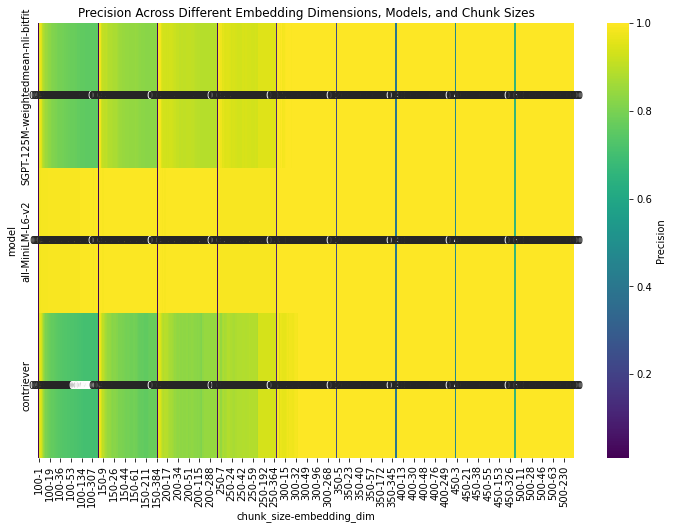

In [237]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# results = df[df['chunk_size'] < 300]
results = df

df_heatmap = results[['model', 'chunk_size', 'embedding_dim', 'f1']]

heatmap_data = df_heatmap.pivot_table(index='model', columns=['chunk_size', 'embedding_dim'], values='f1')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='.2f', cbar_kws={'label': 'Precision'})
plt.title('Precision Across Different Embedding Dimensions, Models, and Chunk Sizes')
plt.show()


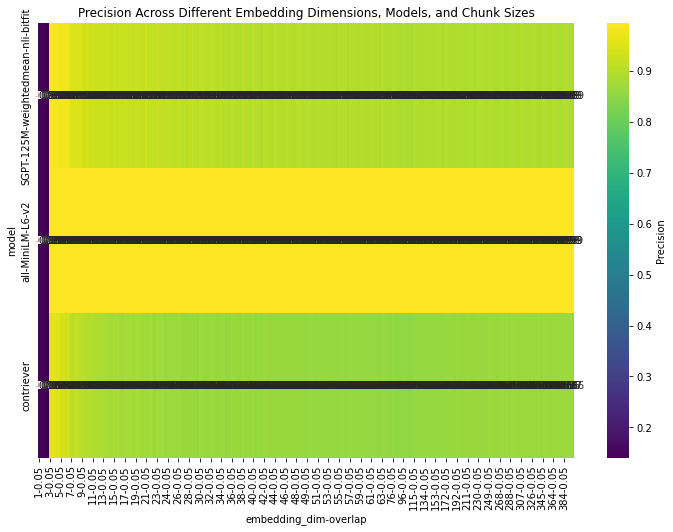

In [232]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = results
df_heatmap = results[['model', 'embedding_dim', 'overlap', 'precision']]

heatmap_data = df_heatmap.pivot_table(index='model', columns=['embedding_dim','overlap'], values='precision')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='.2f', cbar_kws={'label': 'Precision'})
plt.title('Precision Across Different Embedding Dimensions, Models, and Chunk Sizes')
plt.show()


In [217]:
threshold = .97
df[(df['precision'] >= threshold) & (df['query_size'] == (50,100)) ].sort_values(by=['f1']).head()

,model,chunk_size,overlap,embedding_dim,precision,recall,f1,query_size
14552,SGPT-125M-weightedmean-nli-bitfit,250,0.20,5,0.970000,1.0,0.984772,"(50, 100)"
14602,SGPT-125M-weightedmean-nli-bitfit,250,0.25,5,0.970297,1.0,0.984925,"(50, 100)"
14652,SGPT-125M-weightedmean-nli-bitfit,250,0.30,5,0.970297,1.0,0.984925,"(50, 100)"
14705,SGPT-125M-weightedmean-nli-bitfit,300,0.05,11,0.970588,1.0,0.985075,"(50, 100)"
14706,SGPT-125M-weightedmean-nli-bitfit,300,0.05,13,0.970588,1.0,0.985075,"(50, 100)"


In [218]:

df_mean_metrics = df.groupby('model')[['precision', 'f1']].mean().reset_index()
print("Average Metrics Table:")
print(df_mean_metrics)


Average Metrics Table:
                               model  precision        f1
0  SGPT-125M-weightedmean-nli-bitfit   0.890518  0.930795
1                   all-MiniLM-L6-v2   0.976014  0.980901
2                         contriever   0.854705  0.907344


In [219]:
import pandas as pd

results =df

best_precision_rows = results.groupby('model')['precision'].idxmax()
best_recall_rows = results.groupby('model')['recall'].idxmax()
best_f1_rows = results.groupby('model')['f1'].idxmax()

best_precision_settings = results.loc[best_precision_rows, ['model', 'chunk_size', 'overlap']]
best_recall_settings = results.loc[best_recall_rows, ['model', 'chunk_size', 'overlap']]
best_f1_settings = results.loc[best_f1_rows, ['model', 'chunk_size', 'overlap']]

print("Best Settings for Precision:")
print(best_precision_settings)
print("\nBest Settings for Recall:")
print(best_recall_settings)
print("\nBest Settings for F1:")
print(best_f1_settings)


Best Settings for Precision:
                                   model  chunk_size  overlap
12001  SGPT-125M-weightedmean-nli-bitfit         300     0.05
6601                    all-MiniLM-L6-v2         300     0.05
1212                          contriever         300     0.05

Best Settings for Recall:
                                   model  chunk_size  overlap
10800  SGPT-125M-weightedmean-nli-bitfit         100     0.05
5400                    all-MiniLM-L6-v2         100     0.05
0                             contriever         100     0.05

Best Settings for F1:
                                   model  chunk_size  overlap
12001  SGPT-125M-weightedmean-nli-bitfit         300     0.05
6601                    all-MiniLM-L6-v2         300     0.05
1212                          contriever         300     0.05


<AxesSubplot:xlabel='embedding_dim', ylabel='precision'>

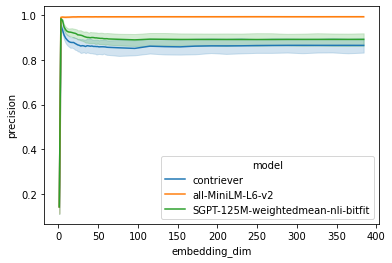

In [221]:
# df = df[df['embedding_dim']<50]
sns.lineplot(data=df, x='embedding_dim', y='precision', hue='model')

<AxesSubplot:xlabel='model', ylabel='f1'>

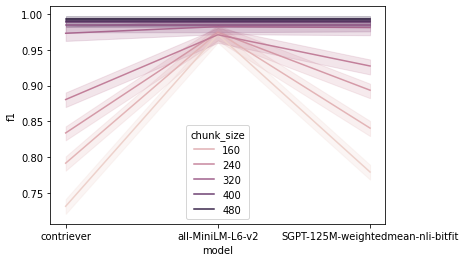

In [188]:
sns.lineplot(data=df, x='model', y='f1', hue='chunk_size')

<AxesSubplot:xlabel='chunk_size', ylabel='precision'>

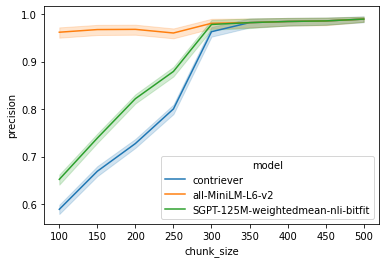

In [252]:
sns.lineplot(data=df, x='chunk_size', y='precision', hue='model')


<AxesSubplot:xlabel='overlap', ylabel='f1'>

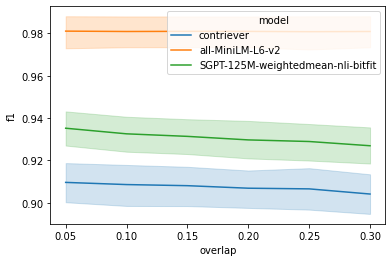

In [190]:
sns.lineplot(data=df, x='overlap', y='f1', hue='model')

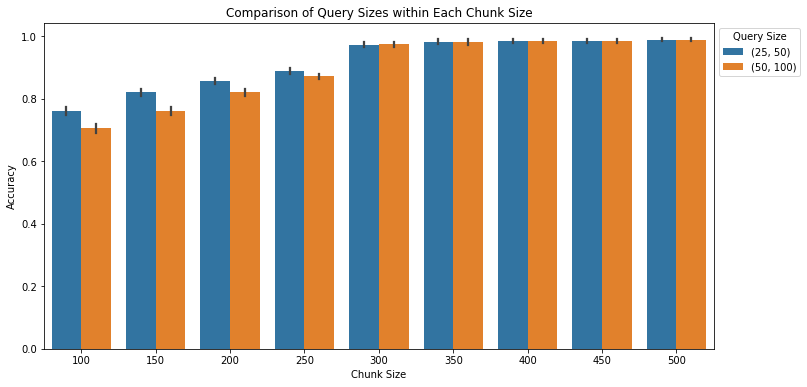

In [246]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with columns chunk_size, accuracy, query_size

plt.figure(figsize=(12, 6))
sns.barplot(x='chunk_size', y='precision', hue='query_size', data=df)
plt.title('Comparison of Query Sizes within Each Chunk Size')
plt.xlabel('Chunk Size')
plt.ylabel('Accuracy')
plt.legend(title='Query Size', bbox_to_anchor=(1, 1))
plt.show()


<AxesSubplot:xlabel='embedding_dim', ylabel='precision'>

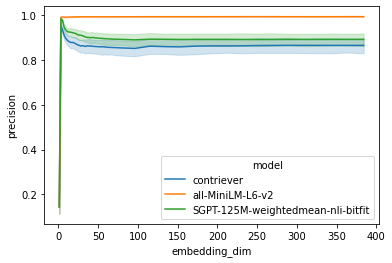

In [192]:
sns.lineplot(data=df, x='embedding_dim', y='precision', hue='model')

<AxesSubplot:xlabel='chunk_size', ylabel='precision'>

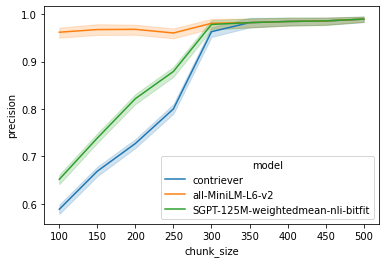

In [193]:
sns.lineplot(data=df, x='chunk_size', y='precision', hue='model')

<AxesSubplot:xlabel='embedding_dim', ylabel='f1'>

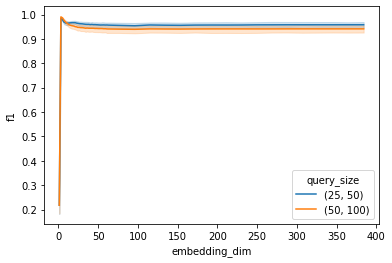

In [194]:
sns.lineplot(data=df, x='embedding_dim', y='f1', hue='query_size')

<AxesSubplot:xlabel='overlap', ylabel='f1'>

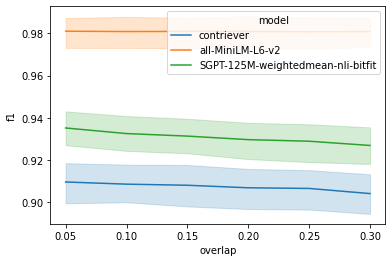

In [195]:
sns.lineplot(data=df, x='overlap', y='f1', hue='model')

<AxesSubplot:xlabel='embedding_dim', ylabel='precision'>

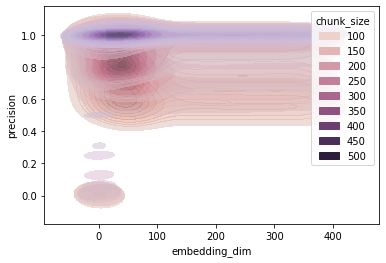

In [196]:
sns.kdeplot(data=df,
            x='embedding_dim',
            y='precision',
            hue='chunk_size',
            fill=True,
            common_norm=False,
            alpha=.5)

<AxesSubplot:xlabel='embedding_dim', ylabel='precision'>

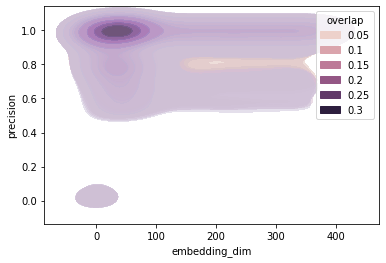

In [197]:
sns.kdeplot(data=df,
            x='embedding_dim',
            y='precision',
            hue='overlap',
            fill=True,
            common_norm=False,
            alpha=.5)

<AxesSubplot:xlabel='chunk_size', ylabel='f1'>

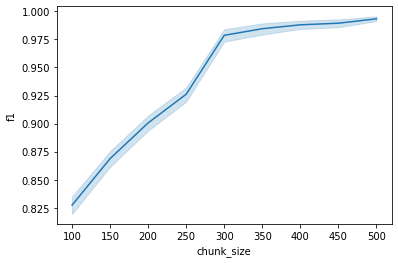

In [198]:
sns.lineplot(data=df, x='chunk_size', y='f1')


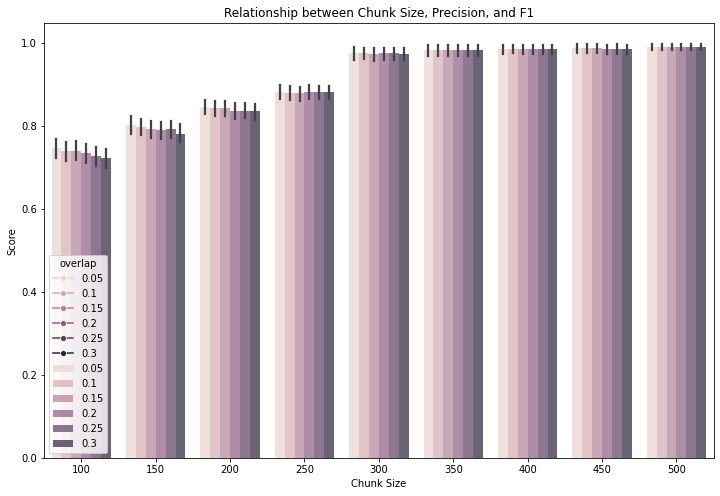

In [199]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Line plot for f1
sns.lineplot(data=df, x='chunk_size', y='precision', hue='overlap', marker='o')

# Bar plot for precision
sns.barplot(data=df, x='chunk_size', y='precision', hue='overlap', alpha=0.7)

plt.title('Relationship between Chunk Size, Precision, and F1')
plt.xlabel('Chunk Size')
plt.ylabel('Score')
plt.show()


In [200]:
import plotly.express as px

fig = px.scatter(df, x='embedding_dim', y='precision', size='chunk_size', color='model',
                 labels={'accuracy': 'Accuracy'},
                 title='Bubble Chart: Embedding Dim, Chunk Size, and Accuracy')
fig.show()


<AxesSubplot:xlabel='embedding_dim', ylabel='chunk_size'>

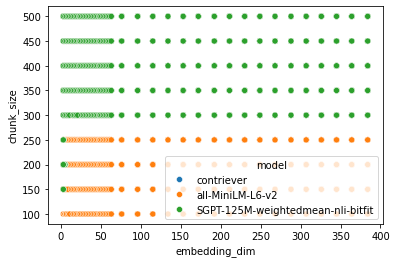

In [201]:
threshold = 0.98
sns.scatterplot(data=df[(df['precision'] >= threshold)], x='embedding_dim', y='chunk_size', hue='model')


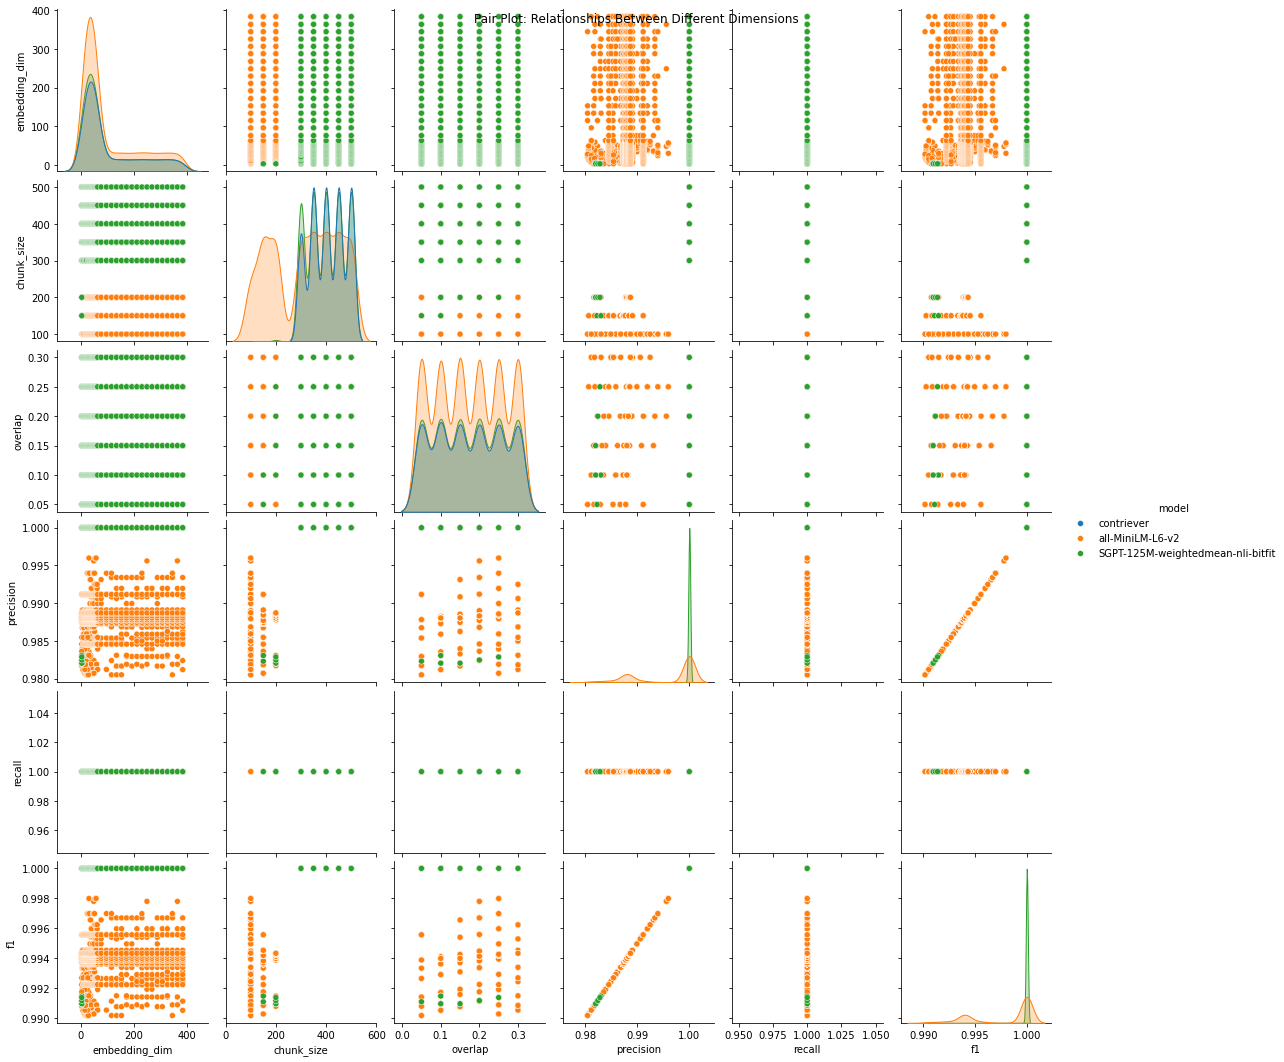

In [202]:
trec_covid_contriever
df = df[df['f1'] > 0.99]
sns.pairplot(df, vars=['embedding_dim', 'chunk_size', 'overlap', 'precision', 'recall', 'f1'], hue='model')
plt.suptitle('Pair Plot: Relationships Between Different Dimensions')
plt.show()


In [203]:

unique_models = np.unique(df['model'])

mean_accuracies = {}

for model in unique_models:
    model_df = df[df['model'] == model]
    
    mean_accuracy = model_df['f1'].mean() #model_df['accuracy'].mean()
    mean_accuracies[model] = mean_accuracy

best_model = max(mean_accuracies, key=mean_accuracies.get)

for model, mean_accuracy in mean_accuracies.items():
    print(f"Model: {model}, Mean Accuracy: {mean_accuracy}")

print(f"\nBest-Performing Model Overall: {best_model} with Mean Accuracy: {mean_accuracies[best_model]}")


Model: SGPT-125M-weightedmean-nli-bitfit, Mean Accuracy: 0.9999754736752501
Model: all-MiniLM-L6-v2, Mean Accuracy: 0.9978746856453502
Model: contriever, Mean Accuracy: 1.0

Best-Performing Model Overall: contriever with Mean Accuracy: 1.0


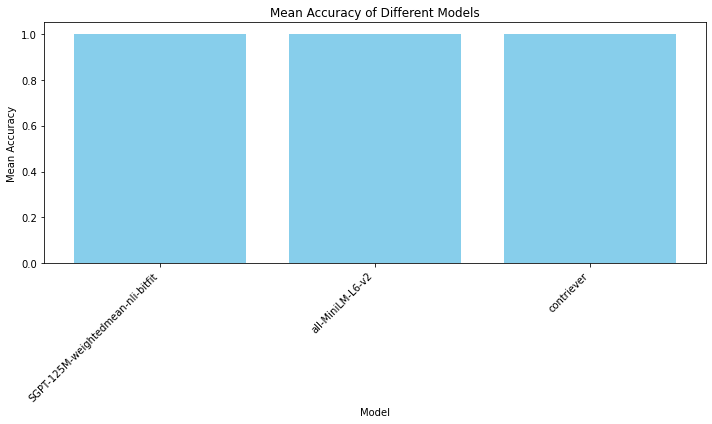

Mean Accuracies Table:
                               Model  Mean Accuracy
0  SGPT-125M-weightedmean-nli-bitfit       0.999975
1                   all-MiniLM-L6-v2       0.997875
2                         contriever       1.000000

Best-Performing Model Overall: contriever with Mean Accuracy: 1.0


In [204]:
import matplotlib.pyplot as plt
import pandas as pd

df_mean_accuracies = pd.DataFrame(list(mean_accuracies.items()), columns=['Model', 'Mean Accuracy'])

plt.figure(figsize=(10, 6))
plt.bar(df_mean_accuracies['Model'], df_mean_accuracies['Mean Accuracy'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('Mean Accuracy')
plt.title('Mean Accuracy of Different Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Mean Accuracies Table:")
print(df_mean_accuracies)

best_model = max(mean_accuracies, key=mean_accuracies.get)
print(f"\nBest-Performing Model Overall: {best_model} with Mean Accuracy: {mean_accuracies[best_model]}")
